In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data_scientists_survey.csv')
df.head()

,JobSatisfaction,Age,Gender,EmployerSize,EmploymentDummy,JobFunctionDummy01,JobFunctionDummy02,CompensationAmount,RemoteWork,Tenure,BarriersOrganizational,BarriersSupport,BarriersTechnical
0,4.5,32,1,10000,0,0,0,30933.160660,3,8.0,2.00,3.00,2.8
1,0.5,33,1,2500,0,0,1,22645.400890,3,1.5,3.25,3.50,3.0
2,4.0,34,1,2500,0,0,1,126178.819000,2,8.0,3.00,2.50,4.0
3,1.5,43,1,300,0,0,1,85000.000000,2,1.5,3.00,3.00,2.5
4,2.5,45,1,15,1,0,0,9.959167,1,0.5,4.00,3.75,4.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
JobSatisfaction,205.0,3.278049,0.997917,0.500000,2.50000,3.50000,4.0,5.0
Age,205.0,33.487805,8.403786,21.000000,27.00000,31.00000,37.0,65.0
Gender,205.0,0.887805,0.316379,0.000000,1.00000,1.00000,1.0,1.0
EmployerSize,205.0,3490.146341,4195.237990,5.000000,60.00000,750.00000,10000.0,10000.0
EmploymentDummy,205.0,0.043902,0.205380,0.000000,0.00000,0.00000,0.0,1.0
JobFunctionDummy01,205.0,0.121951,0.328031,0.000000,0.00000,0.00000,0.0,1.0
JobFunctionDummy02,205.0,0.404878,0.492070,0.000000,0.00000,0.00000,1.0,1.0
CompensationAmount,205.0,72249.969463,63183.261388,4.364903,22939.15229,60073.60531,100000.0,350000.0
RemoteWork,205.0,2.536585,0.831298,1.000000,2.00000,3.00000,3.0,5.0
Tenure,205.0,5.317073,3.331291,0.500000,1.50000,4.00000,8.0,10.0


In [4]:
df.corr()

,JobSatisfaction,Age,Gender,EmployerSize,EmploymentDummy,JobFunctionDummy01,JobFunctionDummy02,CompensationAmount,RemoteWork,Tenure,BarriersOrganizational,BarriersSupport,BarriersTechnical
JobSatisfaction,1.000000,0.066749,-0.110312,-0.045701,-0.035935,-0.163992,-0.000779,0.064775,0.091086,0.073989,-0.057779,-0.259894,0.026550
Age,0.066749,1.000000,-0.027251,0.148433,-0.040870,0.052999,-0.148754,0.461564,0.108298,0.460297,0.110798,0.043369,0.116396
Gender,-0.110312,-0.027251,1.000000,0.034581,0.000736,0.132484,-0.021657,-0.095906,-0.012274,-0.031196,-0.006514,-0.054895,-0.102966
EmployerSize,-0.045701,0.148433,0.034581,1.000000,0.039704,0.037068,-0.020711,0.190319,0.079477,0.127924,0.042231,0.039165,0.016362
EmploymentDummy,-0.035935,-0.040870,0.000736,0.039704,1.000000,0.065662,-0.031232,-0.084189,0.033613,-0.059852,0.002693,-0.069707,0.095374
JobFunctionDummy01,-0.163992,0.052999,0.132484,0.037068,0.065662,1.000000,-0.307392,-0.025101,0.046475,0.121446,0.106652,0.070359,0.045619
JobFunctionDummy02,-0.000779,-0.148754,-0.021657,-0.020711,-0.031232,-0.307392,1.000000,-0.078753,-0.090315,-0.204296,-0.036367,-0.023716,0.001185
CompensationAmount,0.064775,0.461564,-0.095906,0.190319,-0.084189,-0.025101,-0.078753,1.000000,0.055304,0.387216,-0.101987,-0.019982,0.026555
RemoteWork,0.091086,0.108298,-0.012274,0.079477,0.033613,0.046475,-0.090315,0.055304,1.000000,0.203779,0.012138,-0.140593,0.056280
Tenure,0.073989,0.460297,-0.031196,0.127924,-0.059852,0.121446,-0.204296,0.387216,0.203779,1.000000,0.078248,-0.004163,0.080245


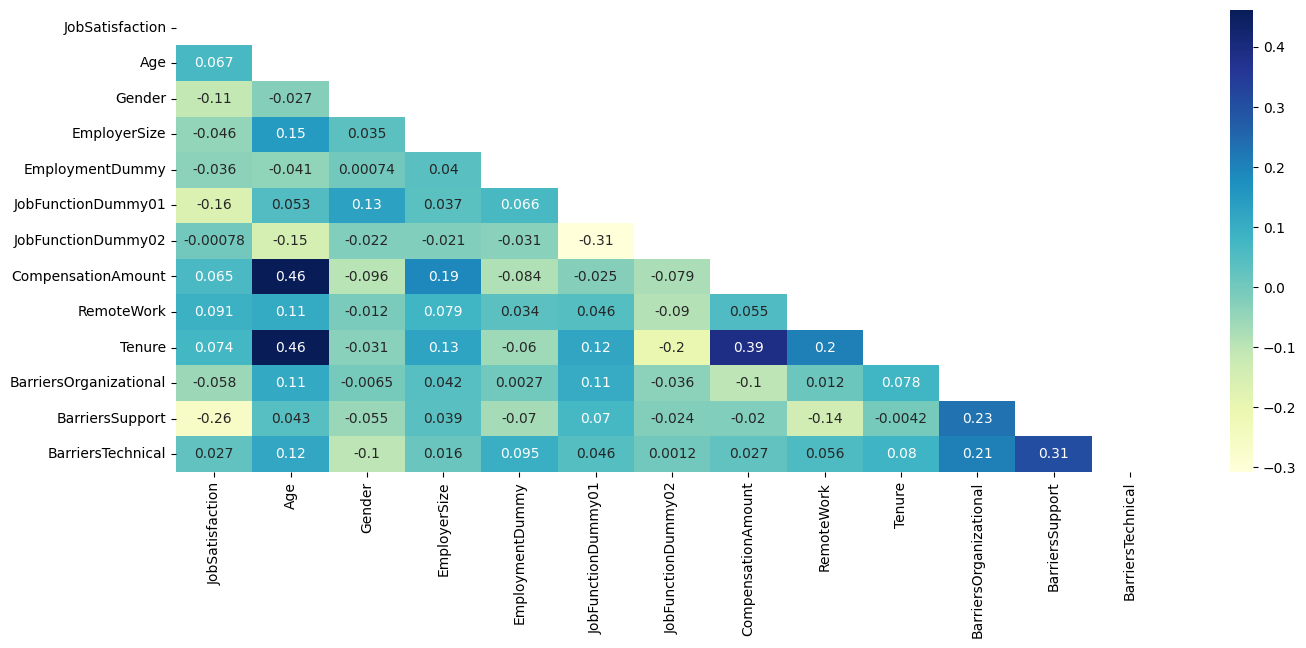

In [5]:
# Create the figure
fig = plt.figure(figsize=(16, 6))

# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr()))

# Plotting a triangle correlation heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)

# Save the figure
# fig.savefig('heatmap_correlation.png')

# Display the heatmap
plt.show()

In [65]:
# Scaling to standardize the variable
scaler = StandardScaler()
df[['Age', 'EmployerSize', 'CompensationAmount', 'Tenure']] = scaler.fit_transform(df[['Age', 'EmployerSize', 'CompensationAmount', 'Tenure']])

# Define the regression formulas for each model
formula1 = 'JobSatisfaction ~ Age + Gender + EmployerSize + EmploymentDummy + JobFunctionDummy01 + JobFunctionDummy02 + CompensationAmount + RemoteWork + Tenure'
formula2 = 'JobSatisfaction ~ Age + Gender + EmployerSize + EmploymentDummy + JobFunctionDummy01 + JobFunctionDummy02 + CompensationAmount + RemoteWork + Tenure + BarriersOrganizational + BarriersSupport + BarriersTechnical'
formula3 = 'JobSatisfaction ~ Age + Gender + EmployerSize + EmploymentDummy + JobFunctionDummy01 + JobFunctionDummy02 + CompensationAmount + RemoteWork + Tenure + BarriersOrganizational + BarriersSupport + BarriersTechnical + CompensationAmount:BarriersOrganizational + CompensationAmount:BarriersSupport + CompensationAmount:BarriersTechnical + Gender:BarriersOrganizational + Gender:BarriersSupport + Gender:BarriersTechnical'

# Fit the models
model1 = ols(formula1, data=df).fit()
model2 = ols(formula2, data=df).fit()
model3 = ols(formula3, data=df).fit()

# Extract results
def extract_results(model):
    coefs = model.params
    std_err = model.bse
    p_values = model.pvalues
    return coefs, std_err, p_values

coefs1, std_err1, p_values1 = extract_results(model1)
coefs2, std_err2, p_values2 = extract_results(model2)
coefs3, std_err3, p_values3 = extract_results(model3)

# Compile results into a table
def format_results(coefs, std_err, p_values):
    formatted_results = []
    for coef, se, p in zip(coefs, std_err, p_values):
        if p < 0.001:
            stars = '***'
        elif p < 0.01:
            stars = '**'
        elif p < 0.05:
            stars = '*'
        elif p < 0.1:
            stars = '†'
        else:
            stars = ''
        formatted_results.append(f'{coef:.2f} {stars} ({se:.2f})')
    return formatted_results

results1 = format_results(coefs1, std_err1, p_values1)
results2 = format_results(coefs2, std_err2, p_values2)
results3 = format_results(coefs3, std_err3, p_values3)

results1.extend('-' * 9)
results2.extend('-' * 6)

# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Model 1': results1,
    'Model 2': results2,
    'Model 3': results3
}, index=model3.params.index)

# Add R-squared and F-statistics to the results
results_df.loc['R-squared'] = [f'{model1.rsquared:.2f}', f'{model2.rsquared:.2f}', f'{model3.rsquared:.2f}']
results_df.loc['F-statistic'] = [f'{model1.fvalue:.2f}', f'{model2.fvalue:.2f}', f'{model3.fvalue:.2f}']

results_df

,Model 1,Model 2,Model 3
Intercept,3.34 *** (0.31),4.21 *** (0.55),2.89 † (1.62)
Age,0.04 (0.08),0.04 (0.08),0.04 (0.08)
Gender,-0.26 (0.22),-0.29 (0.22),1.01 (1.67)
EmployerSize,-0.06 (0.07),-0.04 (0.07),-0.06 (0.07)
EmploymentDummy,-0.10 (0.34),-0.25 (0.33),-0.26 (0.34)
JobFunctionDummy01,-0.52 * (0.23),-0.47 * (0.22),-0.45 * (0.22)
JobFunctionDummy02,-0.07 (0.15),-0.08 (0.15),-0.05 (0.15)
CompensationAmount,0.02 (0.08),0.00 (0.08),-0.59 (0.50)
RemoteWork,0.10 (0.09),0.05 (0.08),0.06 (0.09)
Tenure,0.05 (0.08),0.04 (0.08),0.04 (0.08)
